In [26]:
import os
from os.path import join, exists

from glob import glob

import nibabel as nib
from nibabel.affines import apply_affine

import nilearn

import numpy as np

import matplotlib.pyplot as plt

In [22]:
subj = 'S31'
date = '210817'

In [3]:
dir_root = join('/home/sungbeenpark')
dir_data = join(dir_root, 'GoogleDrive', 'new_preprocessed_data_from_SMC')

In [4]:
fwhm = 4 # Full width at half maximum
thresh_motion = 0.4

In [5]:
output_dir = join(dir_data,'test')
os.makedirs(output_dir, exist_ok=True)

In [6]:
epi = join(dir_data,'%s_%s_fMRI.nii'%(subj,date))
t1 = join(dir_data,'%s_%s_T1.nii'%(subj,date))

epi = nib.load(epi)
t1 = nib.load(t1)

ijk_epi_ctr = (np.array(epi.shape[:3])*0.5).astype(int)
ijk_t1_ctr = (np.array(t1.shape[:3])*0.5).astype(int)

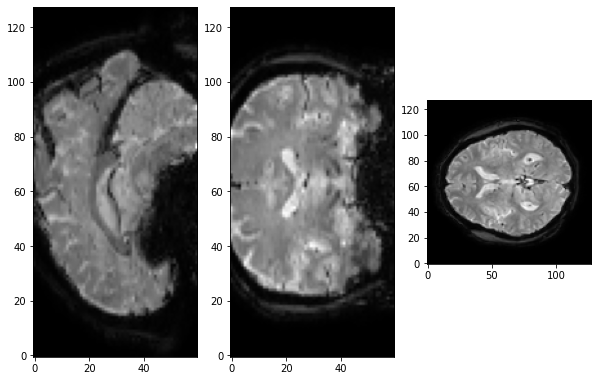

In [24]:
## ## center slices for EPI image
slice_x0 = epi.get_fdata()[ijk_epi_ctr[0],:,:,0]
slice_y0 = epi.get_fdata()[:,ijk_epi_ctr[1],:,0]
slice_z0 = epi.get_fdata()[:,:,ijk_epi_ctr[2],0]

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10,30))

axs[0].imshow(slice_x0, cmap="gray", origin="lower")
axs[1].imshow(slice_y0, cmap="gray", origin="lower")
axs[2].imshow(slice_z0, cmap="gray", origin="lower")

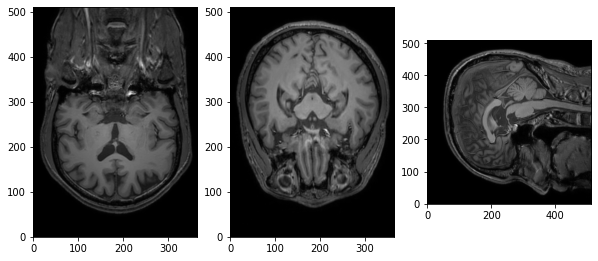

In [32]:
## center slices for T1 image
slice_x0 = t1.get_fdata()[ijk_t1_ctr[0],:,:]
slice_y0 = t1.get_fdata()[:,ijk_t1_ctr[1],:]
slice_z0 = t1.get_fdata()[:,:,ijk_t1_ctr[2]]

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10,30))

axs[0].imshow(slice_x0, cmap="gray", origin="lower")
axs[1].imshow(slice_y0, cmap="gray", origin="lower")
axs[2].imshow(slice_z0, cmap="gray", origin="lower")

In [9]:
np.set_printoptions(precision=3, suppress=True)

In [10]:
print(epi.affine, nib.aff2axcodes(epi.affine), ijk_epi_ctr)

[[ -1.719  -0.019   0.    106.421]
 [  0.018  -1.624  -0.653  75.567]
 [  0.006  -0.561   1.89  106.715]
 [  0.      0.      0.      1.   ]] ('L', 'P', 'S') [64 64 30]


In [11]:
canonical_epi = nib.as_closest_canonical(epi)
print(canonical_epi.affine, nib.aff2axcodes(canonical_epi.affine))

[[   1.719    0.019    0.    -114.314]
 [  -0.018    1.624   -0.653 -128.409]
 [  -0.006    0.561    1.89    36.266]
 [   0.       0.       0.       1.   ]] ('R', 'A', 'S')


In [17]:
apply_affine(epi.affine, ijk_epi_ctr)

array([ -4.816, -46.812, 127.926])

In [13]:
print(t1.affine, nib.aff2axcodes(t1.affine), ijk_t1_ctr)

[[ -0.005   0.      0.5   -93.607]
 [ -0.469   0.     -0.006 126.078]
 [ -0.     -0.469   0.    118.443]
 [  0.      0.      0.      1.   ]] ('P', 'I', 'R') [256 256 182]


In [19]:
canonical_t1 = nib.as_closest_canonical(t1)
print(canonical_t1.affine, nib.aff2axcodes(canonical_t1.affine))

[[   0.5      0.005   -0.     -96.317]
 [  -0.006    0.469   -0.    -113.438]
 [   0.       0.       0.469 -121.088]
 [   0.       0.       0.       1.   ]] ('R', 'A', 'S')


In [14]:
apply_affine(t1.affine, ijk_t1_ctr)

array([-3.971,  5.056, -1.557])